## <center><font color='green'> Explainable AI (XAI) - Random Forest Classifiers [SHAP]

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

In [4]:
import shap 

#### <font color='purple'> Load dataset  

In [5]:
train_dataset_upsampled = pd.read_csv("dataset/Resampled_neonates_train_data_4.csv")
test_dataset_upsampled = pd.read_csv("dataset/Resampled_neonates_test_data_4.csv")

X_train = train_dataset_upsampled.drop(["DEAD"], axis=1) 
y_train = train_dataset_upsampled["DEAD"]

X_test = test_dataset_upsampled.drop(["DEAD"], axis=1) 
y_test = test_dataset_upsampled["DEAD"]

#### <font color='purple'> Normalizing 

In [6]:
columns = X_train.columns.to_list() 

Min_max_scaler = MinMaxScaler().fit(X_train)

## Scaling 
X_train_mm_scaled = Min_max_scaler.transform(X_train)
X_test_mm_scaled = Min_max_scaler.transform(X_test)

## Numpy Array to DataFrame 
df_train_mm_scaled = pd.DataFrame(X_train_mm_scaled, columns = columns)
df_test_mm_scaled = pd.DataFrame(X_test_mm_scaled, columns = columns)

#### <font color='purple'> Feature Selection  

In [7]:
tain_mm_scaled_df = df_train_mm_scaled[:]
tain_mm_scaled_df["DEAD"] = y_train 

test_mm_scaled_df = df_test_mm_scaled[:] 
test_mm_scaled_df["DEAD"] = y_test


importances = mutual_info_classif(df_train_mm_scaled, y_train)
feat_importance = pd.Series(importances, tain_mm_scaled_df.columns[0:len(tain_mm_scaled_df.columns)-1])
    
feat_importance = feat_importance.sort_values(ascending=False)
    
selected_features = feat_importance[:30]
selected_features_list_mm_scaled = selected_features.index.to_list()


tain_mm_scaled_df[selected_features_list_mm_scaled].head(2)

,temperature_mean,respRate_std,respRate_var,skinTemperature_var,skinTemperature_std,heartRate_std,heartRate_var,sao2_std,bpCuffMean_var,sao2_var,...,BIRTH_WEIGHT,bpCuffSystolic_mean,bpCuffDiastolic_mean,temperature_var,sao2_mean,glucometer_mean,temperature_std,bpCuffMean_mean,PLATELET,D10W_MEAN
0,0.775318,0.422245,0.178291,0.017977,0.134078,0.22911,0.057937,0.097817,0.053294,0.009568,...,0.264267,0.602649,0.457143,0.015695,0.881455,0.312593,0.125281,0.310696,0.281330,0.151138
1,0.709668,0.583964,0.341014,0.007512,0.086672,0.28258,0.086102,0.080938,0.020317,0.006551,...,0.437819,0.644907,0.479330,0.003770,0.926056,0.272551,0.061399,0.351928,0.392157,0.196784


In [8]:
X_train_mm = df_train_mm_scaled[selected_features_list_mm_scaled][:] ## using only selected features 
X_test_mm = df_test_mm_scaled[selected_features_list_mm_scaled][:]   ## using only selected features 

In [9]:
X_train_mm.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_var': 'Respiratory Rate (variance)',
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_std': 'Heart Rate (std)', 
           'heartRate_var': 'Heart Rate (variance)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffMean_std': 'Blood Pressure Cuff Mean (std)', 
           'bpCuffMean_var': 'Blood Pressure Cuff Mean (variance)',
           'bpCuffMean_mean': 'Blood Pressure Cuff Mean (mean)',
           'bpCuffSystolic_std': 'Blood Pressure Cuff Systolic (std)',
           'bpCuffSystolic_var': 'Blood Pressure Cuff Systolic (variance)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_var': 'Blood Pressure Cuff Diastolic (variance)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_var': 'SaO2 (variance)', 
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'glucometer_std': 'Glucometer (std)', 
           'glucometer_var': 'Glucometer (variance)', 
           'glucometer_mean': 'Glucometer (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'D10W_SUM': 'Sum of D10W (input)'}, axis=1, inplace=True)

In [10]:
X_test_mm.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_var': 'Respiratory Rate (variance)',
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_std': 'Heart Rate (std)', 
           'heartRate_var': 'Heart Rate (variance)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffMean_std': 'Blood Pressure Cuff Mean (std)', 
           'bpCuffMean_var': 'Blood Pressure Cuff Mean (variance)',
           'bpCuffMean_mean': 'Blood Pressure Cuff Mean (mean)',
           'bpCuffSystolic_std': 'Blood Pressure Cuff Systolic (std)',
           'bpCuffSystolic_var': 'Blood Pressure Cuff Systolic (variance)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_var': 'Blood Pressure Cuff Diastolic (variance)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_var': 'SaO2 (variance)', 
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'glucometer_std': 'Glucometer (std)', 
           'glucometer_var': 'Glucometer (variance)', 
           'glucometer_mean': 'Glucometer (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'D10W_SUM': 'Sum of D10W (input)'}, axis=1, inplace=True)

In [11]:
X_test_org = X_test[selected_features_list_mm_scaled][:]

In [12]:
X_test_org.rename({'temperature_mean': 'Temperature (mean)', 
           'temperature_var': 'Temperature (variance)', 
           'temperature_std': 'Temperature (std)',  
           'respRate_std': 'Respiratory Rate (std)', 
           'respRate_var': 'Respiratory Rate (variance)',
           'respRate_mean': 'Respiratory Rate (mean)', 
           'skinTemperature_var': 'Skin Temperature (variance)', 
           'skinTemperature_std': 'Skin Temperature (std)',
           'skinTemperature_mean': 'Skin Temperature (mean)',
           'heartRate_std': 'Heart Rate (std)', 
           'heartRate_var': 'Heart Rate (variance)',
           'heartRate_mean': 'Heart Rate (mean)',
           'bpCuffMean_std': 'Blood Pressure Cuff Mean (std)', 
           'bpCuffMean_var': 'Blood Pressure Cuff Mean (variance)',
           'bpCuffMean_mean': 'Blood Pressure Cuff Mean (mean)',
           'bpCuffSystolic_std': 'Blood Pressure Cuff Systolic (std)',
           'bpCuffSystolic_var': 'Blood Pressure Cuff Systolic (variance)',
           'bpCuffSystolic_mean': 'Blood Pressure Cuff Systolic (mean)',
           'bpCuffDiastolic_var': 'Blood Pressure Cuff Diastolic (variance)',
           'bpCuffDiastolic_std': 'Blood Pressure Cuff Diastolic (std)',
           'bpCuffDiastolic_mean': 'Blood Pressure Cuff Diastolic (mean)',
           'sao2_var': 'SaO2 (variance)', 
           'sao2_std': 'SaO2 (std)',
           'sao2_mean': 'SaO2 (mean)',
           'glucometer_std': 'Glucometer (std)', 
           'glucometer_var': 'Glucometer (variance)', 
           'glucometer_mean': 'Glucometer (mean)',
           'BIRTH_WEIGHT': 'Birth Weight (kg)', 
           'PLATELET': 'Platelet',
           'D10W_SUM': 'Sum of D10W (input)'}, axis=1, inplace=True)

#### <font color='purple'> Model and Fit

In [13]:
model_rf = RandomForestClassifier(criterion='gini', n_estimators=80, max_depth=2)
model_cat = CatBoostClassifier(learning_rate=0.001, depth=2)

In [14]:
model_rf.fit(X_train_mm, y_train)
model_cat.fit(X_train_mm, y_train)

0:	learn: 0.6923721	total: 175ms	remaining: 2m 54s
1:	learn: 0.6918005	total: 178ms	remaining: 1m 28s
2:	learn: 0.6908498	total: 180ms	remaining: 59.8s
3:	learn: 0.6899147	total: 182ms	remaining: 45.4s
4:	learn: 0.6891647	total: 185ms	remaining: 36.7s
5:	learn: 0.6885276	total: 187ms	remaining: 30.9s
6:	learn: 0.6878381	total: 188ms	remaining: 26.7s
7:	learn: 0.6870615	total: 190ms	remaining: 23.6s
8:	learn: 0.6864378	total: 192ms	remaining: 21.1s
9:	learn: 0.6857034	total: 194ms	remaining: 19.2s
10:	learn: 0.6849340	total: 195ms	remaining: 17.6s
11:	learn: 0.6841502	total: 197ms	remaining: 16.2s
12:	learn: 0.6832348	total: 199ms	remaining: 15.1s
13:	learn: 0.6825637	total: 200ms	remaining: 14.1s
14:	learn: 0.6818279	total: 202ms	remaining: 13.3s
15:	learn: 0.6813129	total: 204ms	remaining: 12.5s
16:	learn: 0.6805425	total: 205ms	remaining: 11.9s
17:	learn: 0.6797803	total: 207ms	remaining: 11.3s
18:	learn: 0.6789596	total: 209ms	remaining: 10.8s
19:	learn: 0.6782058	total: 210ms	remai

206:	learn: 0.5633808	total: 513ms	remaining: 1.96s
207:	learn: 0.5629764	total: 514ms	remaining: 1.96s
208:	learn: 0.5624495	total: 516ms	remaining: 1.95s
209:	learn: 0.5619507	total: 517ms	remaining: 1.95s
210:	learn: 0.5615399	total: 519ms	remaining: 1.94s
211:	learn: 0.5610501	total: 521ms	remaining: 1.93s
212:	learn: 0.5606404	total: 522ms	remaining: 1.93s
213:	learn: 0.5601571	total: 524ms	remaining: 1.92s
214:	learn: 0.5596562	total: 525ms	remaining: 1.92s
215:	learn: 0.5591809	total: 527ms	remaining: 1.91s
216:	learn: 0.5585517	total: 529ms	remaining: 1.91s
217:	learn: 0.5580164	total: 530ms	remaining: 1.9s
218:	learn: 0.5573922	total: 532ms	remaining: 1.9s
219:	learn: 0.5568856	total: 534ms	remaining: 1.89s
220:	learn: 0.5562592	total: 535ms	remaining: 1.89s
221:	learn: 0.5557597	total: 537ms	remaining: 1.88s
222:	learn: 0.5553028	total: 539ms	remaining: 1.88s
223:	learn: 0.5549159	total: 541ms	remaining: 1.87s
224:	learn: 0.5544242	total: 542ms	remaining: 1.87s
225:	learn: 0.

429:	learn: 0.4704530	total: 859ms	remaining: 1.14s
430:	learn: 0.4701154	total: 860ms	remaining: 1.14s
431:	learn: 0.4698458	total: 862ms	remaining: 1.13s
432:	learn: 0.4695173	total: 863ms	remaining: 1.13s
433:	learn: 0.4691954	total: 865ms	remaining: 1.13s
434:	learn: 0.4688931	total: 866ms	remaining: 1.13s
435:	learn: 0.4685864	total: 868ms	remaining: 1.12s
436:	learn: 0.4682699	total: 869ms	remaining: 1.12s
437:	learn: 0.4679384	total: 871ms	remaining: 1.12s
438:	learn: 0.4673333	total: 873ms	remaining: 1.11s
439:	learn: 0.4670418	total: 874ms	remaining: 1.11s
440:	learn: 0.4667808	total: 876ms	remaining: 1.11s
441:	learn: 0.4664483	total: 877ms	remaining: 1.11s
442:	learn: 0.4661499	total: 879ms	remaining: 1.1s
443:	learn: 0.4658285	total: 880ms	remaining: 1.1s
444:	learn: 0.4655144	total: 882ms	remaining: 1.1s
445:	learn: 0.4651932	total: 883ms	remaining: 1.1s
446:	learn: 0.4648676	total: 885ms	remaining: 1.09s
447:	learn: 0.4646154	total: 886ms	remaining: 1.09s
448:	learn: 0.46

651:	learn: 0.4037097	total: 1.21s	remaining: 644ms
652:	learn: 0.4035115	total: 1.21s	remaining: 642ms
653:	learn: 0.4032846	total: 1.21s	remaining: 640ms
654:	learn: 0.4030630	total: 1.21s	remaining: 638ms
655:	learn: 0.4028719	total: 1.21s	remaining: 636ms
656:	learn: 0.4026424	total: 1.21s	remaining: 634ms
657:	learn: 0.4024386	total: 1.22s	remaining: 632ms
658:	learn: 0.4021089	total: 1.22s	remaining: 630ms
659:	learn: 0.4019101	total: 1.22s	remaining: 628ms
660:	learn: 0.4017032	total: 1.22s	remaining: 626ms
661:	learn: 0.4015090	total: 1.22s	remaining: 624ms
662:	learn: 0.4013200	total: 1.22s	remaining: 622ms
663:	learn: 0.4011015	total: 1.23s	remaining: 620ms
664:	learn: 0.4009067	total: 1.23s	remaining: 618ms
665:	learn: 0.4004570	total: 1.23s	remaining: 616ms
666:	learn: 0.4002309	total: 1.23s	remaining: 614ms
667:	learn: 0.4000251	total: 1.23s	remaining: 612ms
668:	learn: 0.3997692	total: 1.23s	remaining: 610ms
669:	learn: 0.3995584	total: 1.23s	remaining: 608ms
670:	learn: 

877:	learn: 0.3568705	total: 1.55s	remaining: 216ms
878:	learn: 0.3567576	total: 1.55s	remaining: 214ms
879:	learn: 0.3566082	total: 1.55s	remaining: 212ms
880:	learn: 0.3564400	total: 1.56s	remaining: 210ms
881:	learn: 0.3562723	total: 1.56s	remaining: 208ms
882:	learn: 0.3561139	total: 1.56s	remaining: 207ms
883:	learn: 0.3559583	total: 1.56s	remaining: 205ms
884:	learn: 0.3557911	total: 1.56s	remaining: 203ms
885:	learn: 0.3556419	total: 1.56s	remaining: 201ms
886:	learn: 0.3554813	total: 1.56s	remaining: 199ms
887:	learn: 0.3553566	total: 1.57s	remaining: 198ms
888:	learn: 0.3552004	total: 1.57s	remaining: 196ms
889:	learn: 0.3550341	total: 1.57s	remaining: 194ms
890:	learn: 0.3549026	total: 1.57s	remaining: 192ms
891:	learn: 0.3547122	total: 1.57s	remaining: 190ms
892:	learn: 0.3545505	total: 1.57s	remaining: 189ms
893:	learn: 0.3544276	total: 1.58s	remaining: 187ms
894:	learn: 0.3542622	total: 1.58s	remaining: 185ms
895:	learn: 0.3541497	total: 1.58s	remaining: 183ms
896:	learn: 

In [15]:
print(f'Random Forest Classifier accuracy: {round(model_rf.score(X_test_mm, y_test), 3)}')
print(f'CatBoost Classifier accuracy: {round(model_cat.score(X_test_mm, y_test), 3)}')

Random Forest Classifier accuracy: 0.954
CatBoost Classifier accuracy: 0.948


### <font color='purple'> Explainability

In [22]:
explainer = shap.TreeExplainer(model_rf)  
shap_values = explainer.shap_values(X_test_mm)
base_value = explainer.expected_value

In [86]:
X_test_mm.iloc[1000]

Temperature (mean)                          0.805726
Respiratory Rate (std)                      0.495837
Respiratory Rate (variance)                 0.245854
Skin Temperature (std)                      0.082765
Skin Temperature (variance)                 0.006850
Heart Rate (std)                            0.591220
Heart Rate (variance)                       0.356992
Blood Pressure Cuff Mean (variance)         0.136895
SaO2 (std)                                  0.666006
SaO2 (variance)                             0.443564
Blood Pressure Cuff Mean (std)              0.369993
Heart Rate (mean)                           0.683943
Blood Pressure Cuff Systolic (std)          0.251499
Respiratory Rate (mean)                     0.690225
Blood Pressure Cuff Systolic (variance)     0.063252
Glucometer (variance)                       0.204839
Glucometer (std)                            0.452592
Skin Temperature (mean)                     0.719284
Blood Pressure Cuff Diastolic (std)         0.

In [95]:
X_test_org.iloc[250]

Temperature (mean)                           35.917647
Respiratory Rate (std)                       13.874959
Respiratory Rate (variance)                 192.514493
Skin Temperature (std)                        0.260402
Skin Temperature (variance)                   0.067809
Heart Rate (std)                             16.348946
Heart Rate (variance)                       267.288044
Blood Pressure Cuff Mean (variance)          88.218182
SaO2 (std)                                    1.825246
SaO2 (variance)                               3.331522
Blood Pressure Cuff Mean (std)                9.392453
Heart Rate (mean)                           132.625000
Blood Pressure Cuff Systolic (std)            3.583915
Respiratory Rate (mean)                      54.083333
Blood Pressure Cuff Systolic (variance)      12.844444
Glucometer (variance)                        26.809524
Glucometer (std)                              5.177791
Skin Temperature (mean)                      36.106666
Blood Pres

In [96]:
X_test_org.iloc[1005]

Temperature (mean)                           36.700001
Respiratory Rate (std)                        1.154701
Respiratory Rate (variance)                   1.333333
Skin Temperature (std)                        0.220506
Skin Temperature (variance)                   0.048623
Heart Rate (std)                             11.430952
Heart Rate (variance)                       130.666667
Blood Pressure Cuff Mean (variance)          45.128623
SaO2 (std)                                    2.334368
SaO2 (variance)                               5.449275
Blood Pressure Cuff Mean (std)                6.717784
Heart Rate (mean)                           155.166667
Blood Pressure Cuff Systolic (std)           12.175052
Respiratory Rate (mean)                      26.333333
Blood Pressure Cuff Systolic (variance)     148.231884
Glucometer (variance)                       592.000000
Glucometer (std)                             24.331050
Skin Temperature (mean)                      36.691667
Blood Pres

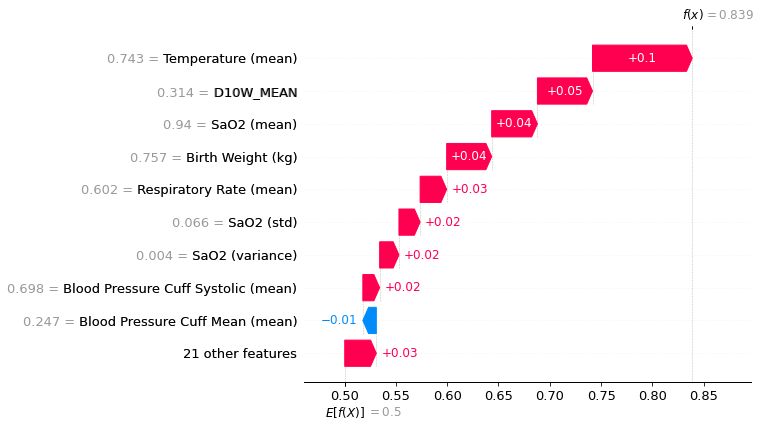

None

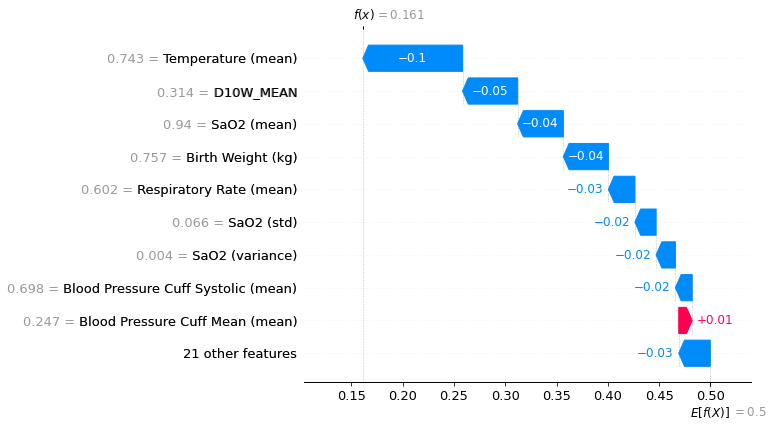

None

In [92]:
row = 250 # Patient number --> row in the dataframe --> should be less than or equal to size(X_test)
for which_class in range(2): 
    ## shap_values is list object having 4 arrays
    display(
    shap.waterfall_plot(shap.Explanation(values=shap_values[int(which_class)][row], 
                                         base_values=explainer.expected_value[int(which_class)], 
                                         data=X_test_mm.iloc[row],  # added this line
                                         feature_names=X_test_mm.columns.tolist()))
)

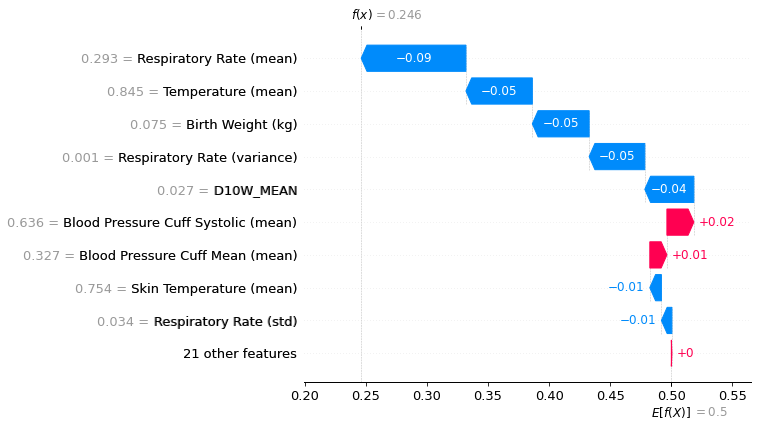

None

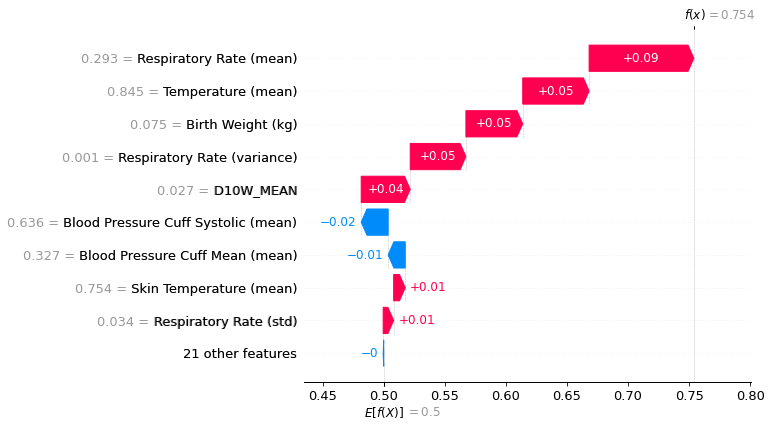

None

In [94]:
row = 1005
# Patient number --> row in the dataframe --> should be less than or equal to size(X_test)
for which_class in range(2): 
    ## shap_values is list object having 4 arrays
    display(
    shap.waterfall_plot(shap.Explanation(values=shap_values[int(which_class)][row], 
                                         base_values=explainer.expected_value[int(which_class)], 
                                         data=X_test_mm.iloc[row],  # added this line
                                         feature_names=X_test_mm.columns.tolist()))
)

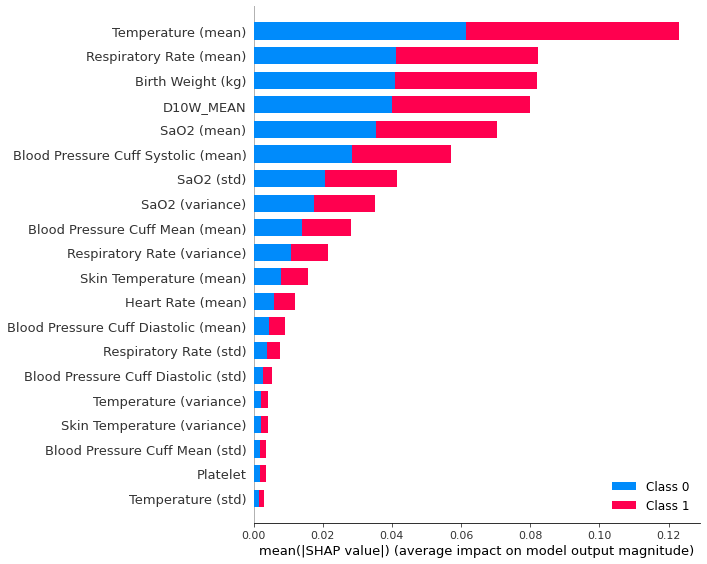

In [25]:
shap.summary_plot(shap_values, X_test_mm, feature_names=X_test_mm.columns, plot_type="bar")

In [24]:
shap.initjs()
choosen_instance = X_test_mm.loc[[200]]
shap_values_instance = explainer.shap_values(choosen_instance)   # four arrays
shap.force_plot(explainer.expected_value[0], shap_values_instance[0], choosen_instance)